In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,classification_report,mean_squared_error, mean_absolute_error

In [36]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Checking all the columns

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking nulls

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No nulls present.

## Checking datatypes

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total charges should be of float data type, we should convert it to float.

In [28]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Looking at the above data we can conclude that this customer has yet not taken any services and opted for any tenure thus its tenure is 0 and so its total charges should be 0 as well.

In [37]:
#Finding all those index where total charges is blank
i=df.loc[df['TotalCharges']==" "].index
i

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Here we could observe that all the values of tenure is 0. So in all these rows we will fill 0 for total charges.

In [38]:
df.at[i,'TotalCharges']=0

In [6]:
#checking changes occured or not
df['TotalCharges'].value_counts()

0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [39]:
df[['TotalCharges']] = df[['TotalCharges']].apply(pd.to_numeric)

In [57]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Relation between features and label

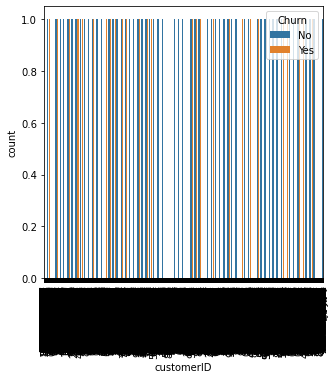

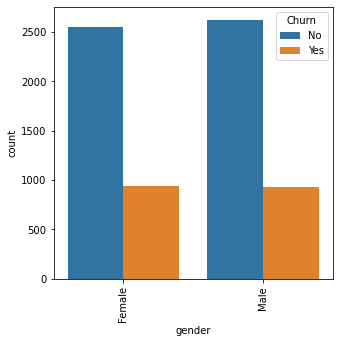

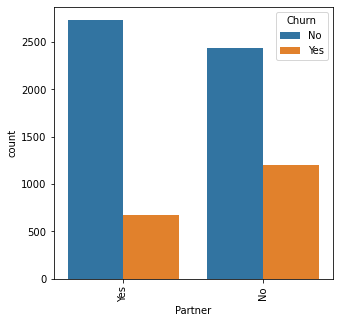

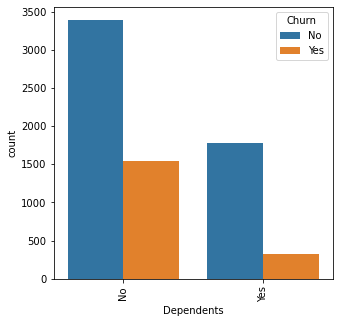

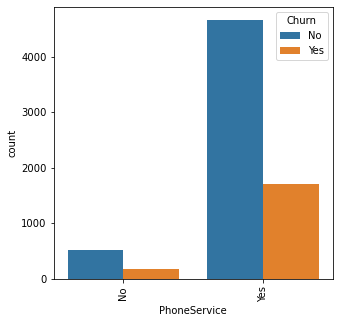

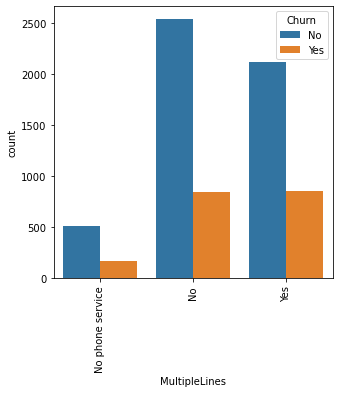

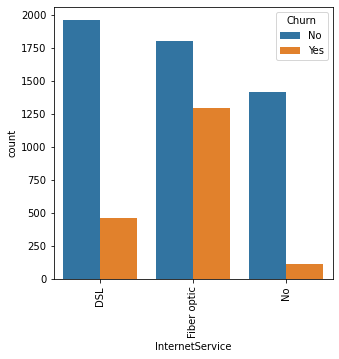

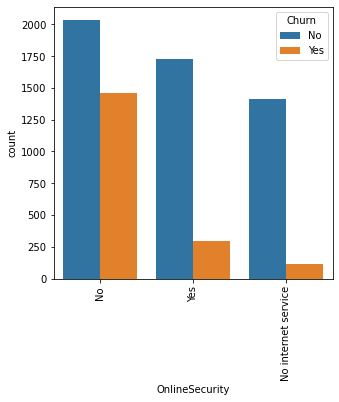

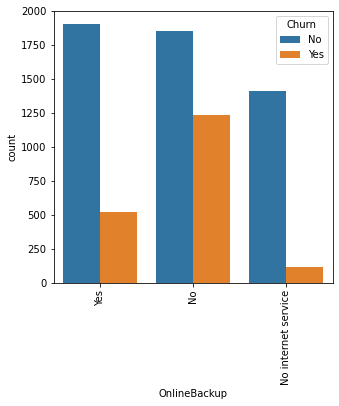

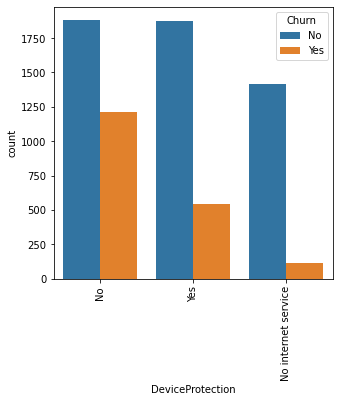

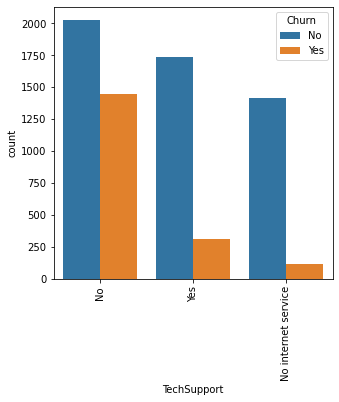

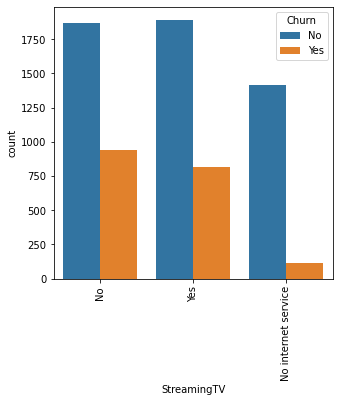

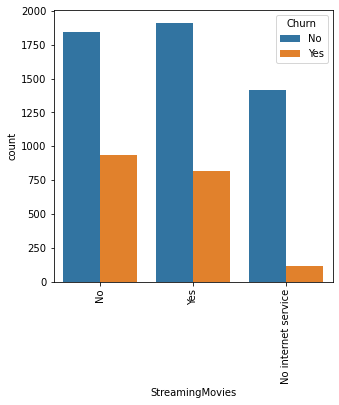

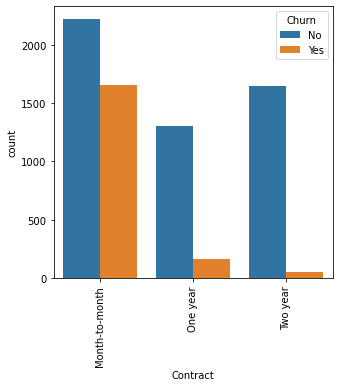

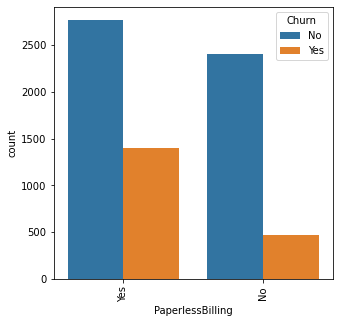

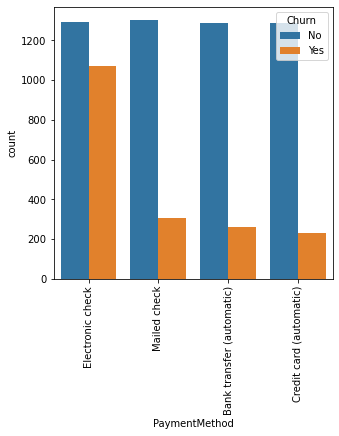

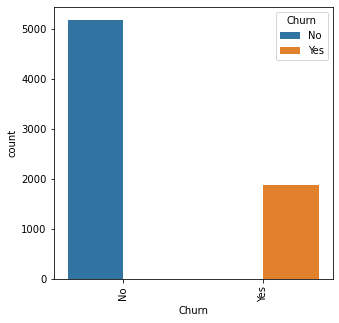

In [41]:
#Categorical features
col=df.select_dtypes(include=['object'])

#Plotting count plot for each feature
for i in col:
    plt.figure(figsize=(5,5))
    a=sns.countplot(x=df[i],hue=df['Churn'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation:We can observe that chur is irrepective of gender. Customer who has dependents has lesser chur rate. People using phone services has higher chances of having churn no.
    Churn rates are higher for those customers having multiple lines.Customers using fiber optic internet service has higher churn rate.
    Customers having no online Security, no online backup, no device protection, no techsupport has higher chance of churn. Customers having month to month contract has higher rate of churn.
    customers opted for paperless billing has higher chances of churn. If payment method is electonic check then more churn rate.

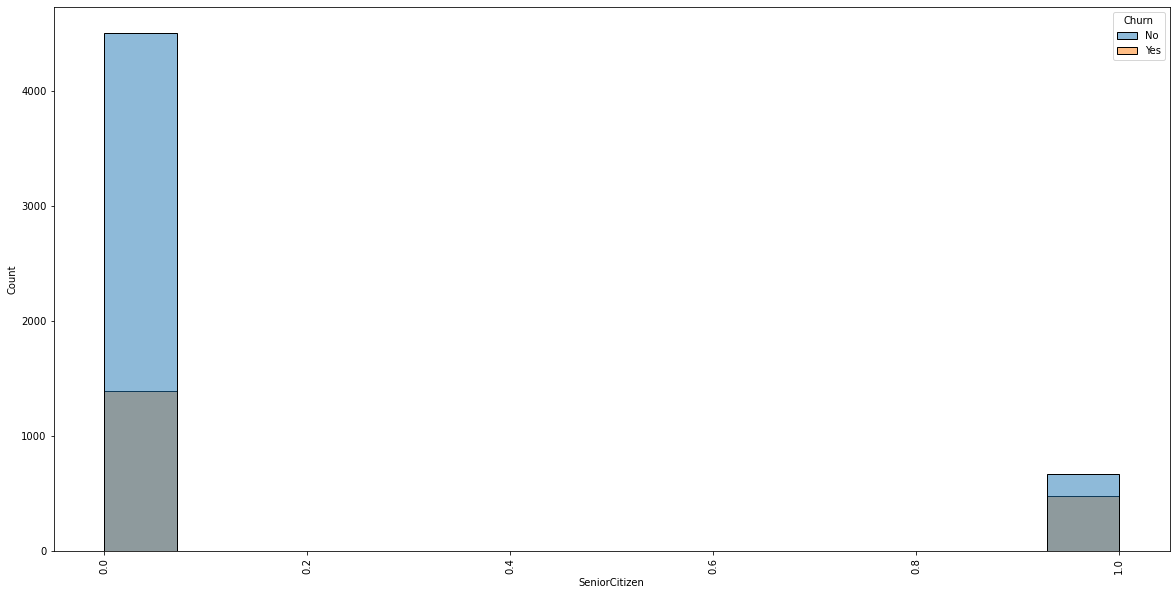

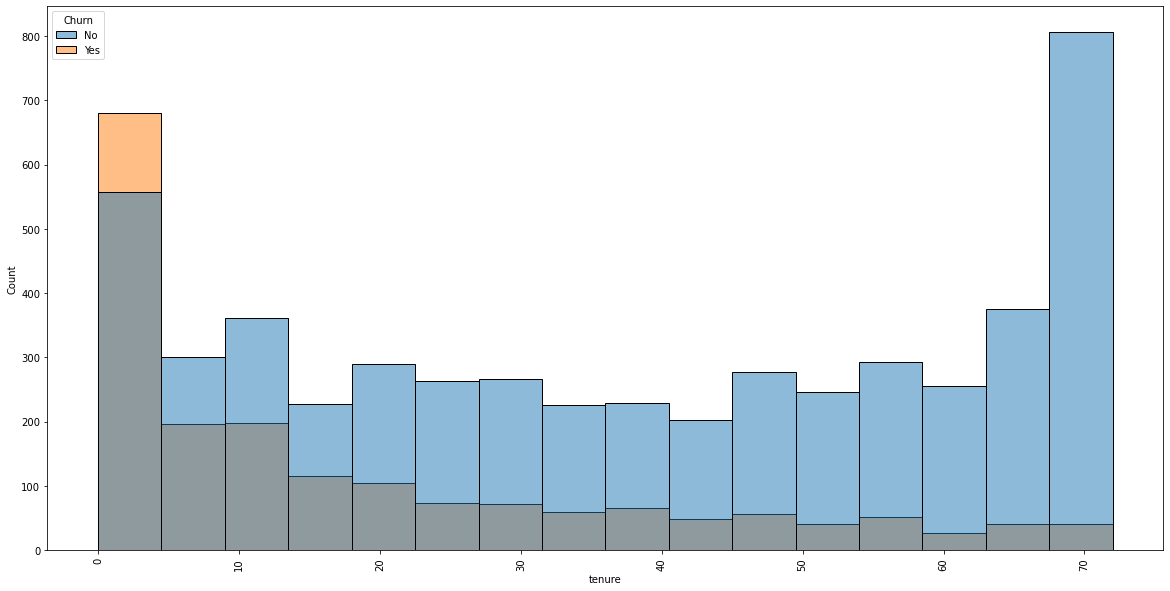

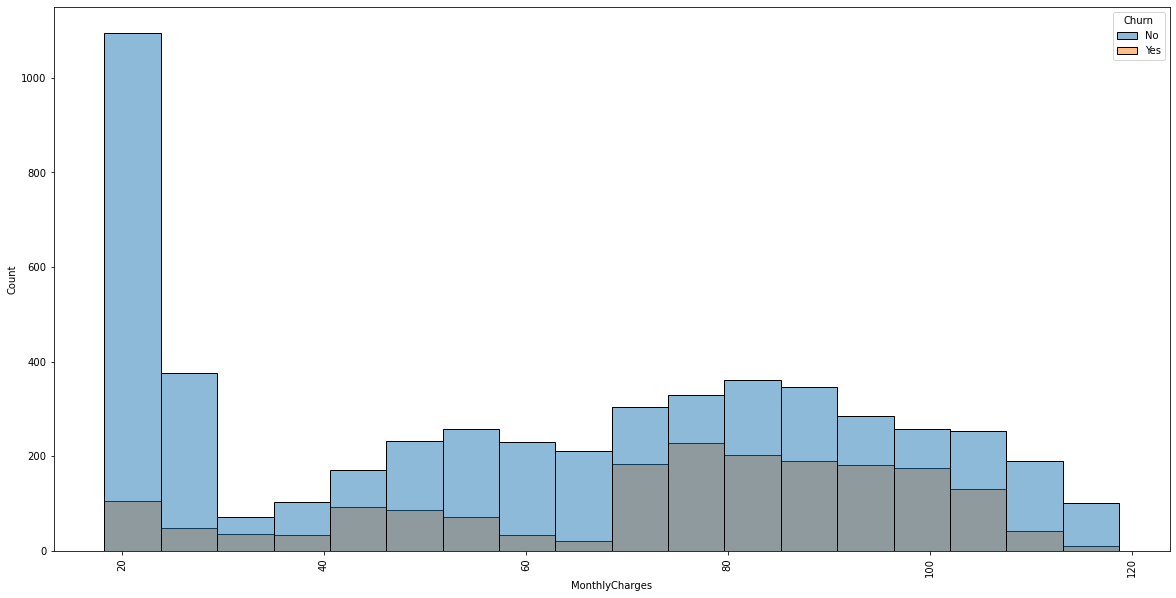

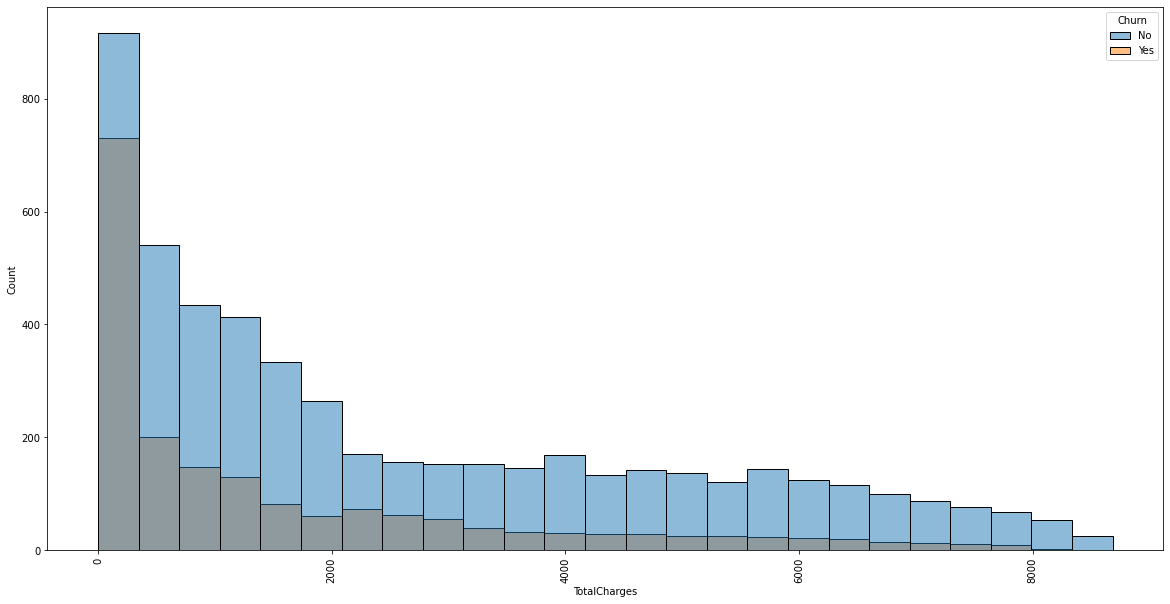

In [10]:
#for continuous feature
colc=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
#Plotting histogram plot for each feature

for i in colc:
    plt.figure(figsize=(20,10))
    a=sns.histplot(x=df[i],hue=df['Churn'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation: Senior citizens has higher chances of churn. Lesser the tenure higher the churn rate amd more value of tenure lesser the chances of churn. Lesser the total charges higher the churn rate and more the total charges less the churn rate.

## Describing the data

In [66]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Encoding

In [42]:
oe=OrdinalEncoder()
col=col.drop(['Churn'],axis=1)
for i in col:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,No
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,No
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,Yes
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,No
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,No
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,No
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,No
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,Yes


## Label encoding for label

In [43]:
le=LabelEncoder()
i='Churn'
df1=le.fit_transform(df[[i]])
df[i]=df1
df

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1


## Checking correlation between features

In [69]:
df.corr().abs()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,0.002074,0.026729,0.012823,0.008035,0.006483,0.004316,0.012407,0.013292,...,0.006918,0.001140,0.007777,0.016746,0.015028,0.001945,0.011604,0.003916,0.000376,0.017447
gender,0.006288,1.000000,0.001874,0.001808,0.010517,0.005106,0.006488,0.006739,0.000863,0.015017,...,0.000549,0.006825,0.006421,0.008743,0.000126,0.011754,0.017352,0.014569,0.000080,0.008612
SeniorCitizen,0.002074,0.001874,1.000000,0.016479,0.211185,0.016567,0.008576,0.146185,0.032310,0.128221,...,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.220173,0.103006,0.150889
Partner,0.026729,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.096848,0.317504,0.150448
Dependents,0.012823,0.010517,0.211185,0.452676,1.000000,0.159712,0.001762,0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.113890,0.062078,0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.370436,0.247900,0.826178,0.352229
PhoneService,0.006483,0.006488,0.008576,0.017706,0.001762,0.008448,1.000000,0.020538,0.387436,0.015198,...,0.003727,0.019158,0.055353,0.043870,0.002247,0.016505,0.004184,0.247398,0.113214,0.011942
MultipleLines,0.004316,0.006739,0.146185,0.142410,0.024991,0.343032,0.020538,1.000000,0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.433576,0.452577,0.038037
InternetService,0.012407,0.000863,0.032310,0.000891,0.044590,0.030359,0.387436,0.109216,1.000000,0.028416,...,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.323260,0.175755,0.047291
OnlineSecurity,0.013292,0.015017,0.128221,0.150828,0.152166,0.325468,0.015198,0.007141,0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.053878,0.253224,0.289309


<AxesSubplot:>

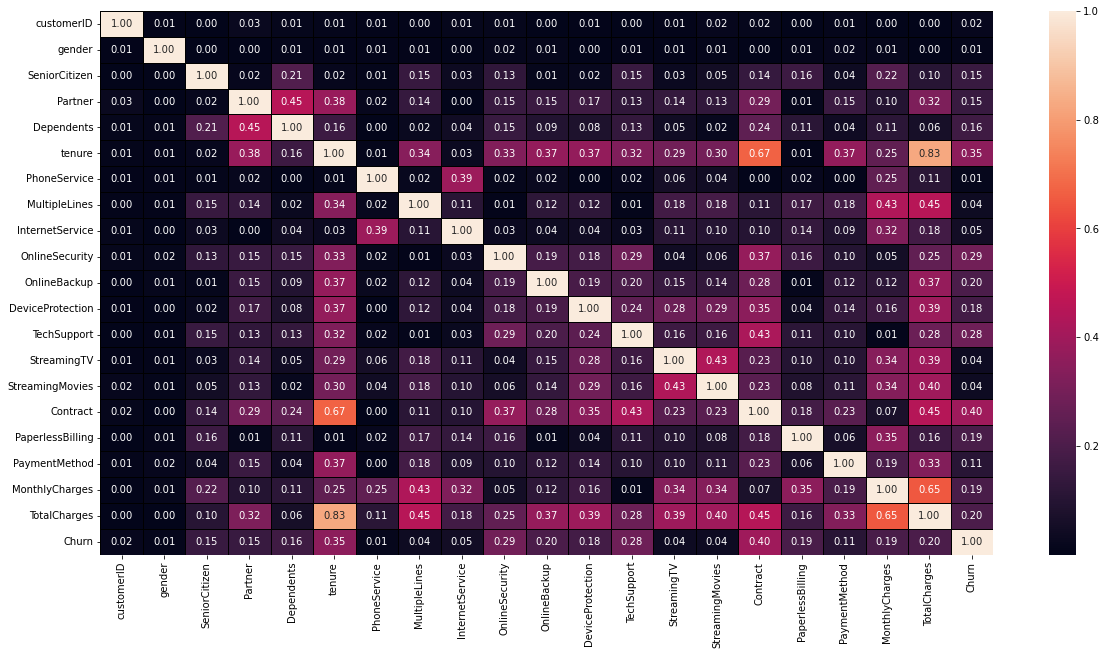

In [70]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: We could observe that there are chances of multicollinearity among tenure and TotalCharges, contract and tenure, monthlycharges and total charges.
    So to be sure of multicollinearity lets find vif score.

## VIF

In [71]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,3.703802,customerID
1,1.961374,gender
2,1.373269,SeniorCitizen
3,2.822358,Partner
4,1.965430,Dependents
5,15.402382,tenure
6,15.307662,PhoneService
7,2.758418,MultipleLines
8,4.383765,InternetService
9,2.269605,OnlineSecurity


We can observe that MonthlyCharges,tenure,PhoneService and TotalCharges vif score is greater than 10 so we need to drop the one with highest vif to remove multicollinearity.

In [44]:
#Let us drop MonthlyCharges first due to highest vif score
df=df.drop(['MonthlyCharges'],axis=1)

In [14]:
#checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,3.605294,customerID
1,1.950276,gender
2,1.354836,SeniorCitizen
3,2.817414,Partner
4,1.965424,Dependents
5,14.109998,tenure
6,9.092346,PhoneService
7,2.561372,MultipleLines
8,3.661314,InternetService
9,2.269572,OnlineSecurity


Let us continue now.

## Checking outliers

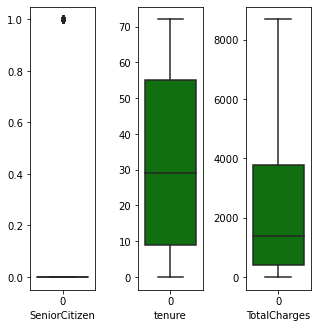

In [77]:
colc=['SeniorCitizen','tenure','TotalCharges']
plt.figure(figsize=(30,90))
for i in range(len(colc)):
    plt.subplot(20,20,i+1)
    sns.boxplot(data=df[colc[i]],color='green',orient='v')
    plt.xlabel(colc[i],fontsize=10)
    plt.tight_layout()

No outliers present.

## Checking skewness

In [78]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
TotalCharges        0.963235
Churn               1.063031
dtype: float64

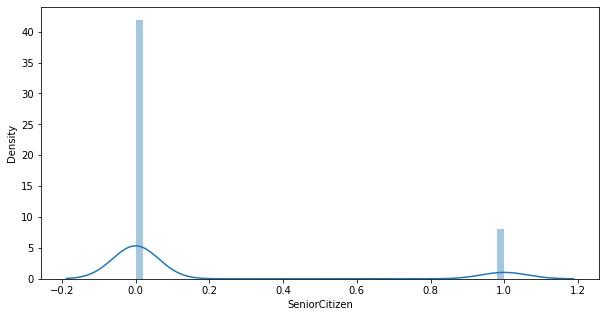

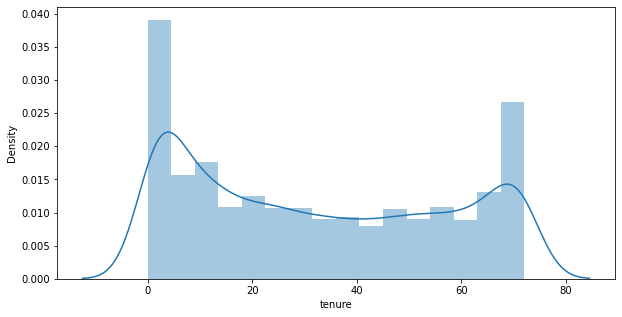

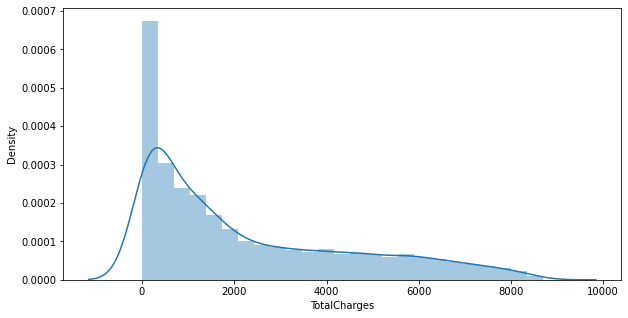

In [80]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')
colc=['SeniorCitizen','tenure','TotalCharges']
# for feature Length
for i in range(3):
    plt.figure(figsize=(10,5))
    sns.distplot(df[colc[i]])
    plt.xlabel(colc[i],fontsize=10)

Skewness is present in TotalCharges and so we need to treat it.

## Treating skewness

In [45]:
#using yeo-johnson transformation
df['TotalCharges']=power_transform(df[['TotalCharges']].to_numpy().reshape(-1,1),method='yeo-johnson')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.792996,0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.254809,0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-1.375173,1
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.233807,0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.239490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.297072,0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.567851,0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-0.852764,0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.915332,1


In [82]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
TotalCharges       -0.146121
Churn               1.063031
dtype: float64

No skewness present now.

## Checking data is balanced or not

In [99]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

data is not balanced, we need to balance it by doing upsampling.

In [46]:
from sklearn.utils import resample

NoChurn=df[df.Churn==0]
YesChurn=df[df.Churn==1]
Yes_upsampled=resample(YesChurn,replace=True,n_samples=len(NoChurn),random_state=27)
df_up=pd.concat([NoChurn,Yes_upsampled])
df_up['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Standardisation

In [47]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [48]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.91189045, -1.00955867, -0.43991649, ...,  0.8297975 ,
         0.39855772, -1.79299643],
       [ 0.21690598,  0.99053183, -0.43991649, ..., -1.20511329,
         1.33486261,  0.25480918],
       [-0.47070074,  0.99053183, -0.43991649, ...,  0.8297975 ,
         1.33486261, -1.37517297],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ...,  0.8297975 ,
         0.39855772, -0.85276427],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  0.8297975 ,
         1.33486261, -0.91533153],
       [-0.63694614,  0.99053183, -0.43991649, ...,  0.8297975 ,
        -1.47405205,  1.48509473]])

## Train Test Split

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 25

Train Accuracy-  79.3

Test Accuracy-  79.3


At random state: 98

Train Accuracy-  79.2

Test Accuracy-  79.2


At random state: 141

Train Accuracy-  79.1

Test Accuracy-  79.1


At random state: 149

Train Accuracy-  79.4

Test Accuracy-  79.4


At random state: 182

Train Accuracy-  79.3

Test Accuracy-  79.3


At random state: 236

Train Accuracy-  79.2

Test Accuracy-  79.2


At random state: 243

Train Accuracy-  79.4

Test Accuracy-  79.4


At random state: 285

Train Accuracy-  79.3

Test Accuracy-  79.3


At random state: 313

Train Accuracy-  79.3

Test Accuracy-  79.3


At random state: 336

Train Accuracy-  79.3

Test Accuracy-  79.3


At random state: 358

Train Accuracy-  79.4

Test Accuracy-  79.4


At random state: 399

Train Accuracy-  79.4

Test Accuracy-  79.4


At random state: 402

Train Accuracy-  79.4

Test Accuracy-  79.4


At random state: 478

Train Accuracy-  79.3

Test Accuracy-  79.3


 Best accuracy at random state- 149


## Logistic Regression

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=149,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 79.4

test accuracy- 79.4


## Cross Validation Score

In [87]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 79.21351504826804

 Accuracy score is- 79.4


At cv- 5

 cross validation score is- 79.1567903574424

 Accuracy score is- 79.4


At cv- 6

 cross validation score is- 79.21364333699802

 Accuracy score is- 79.4


At cv- 7

 cross validation score is- 79.1710088454942

 Accuracy score is- 79.4


At cv- 8

 cross validation score is- 79.17107367660716

 Accuracy score is- 79.4


At cv- 9

 cross validation score is- 79.11436438643423

 Accuracy score is- 79.4


At cv- 10

 cross validation score is- 79.25632656350741

 Accuracy score is- 79.4


At cv- 11

 cross validation score is- 79.18539923415119

 Accuracy score is- 79.4


At cv- 12

 cross validation score is- 79.19966257924348

 Accuracy score is- 79.4


At cv- 13

 cross validation score is- 79.0291210177849

 Accuracy score is- 79.4


At cv- 14

 cross validation score is- 79.19951943666797

 Accuracy score is- 79.4


At cv- 15

 cross validation score is- 79.1002132196162

 Accuracy score

So we are getting the least difference between cross_val_score and accuracy score at cv=6

In [22]:
cv_score_best=cross_val_score(lr,x,y,cv=6).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 79.21364333699802
accuracy score for linear regression model is- 79.4


## Confusion Matrix

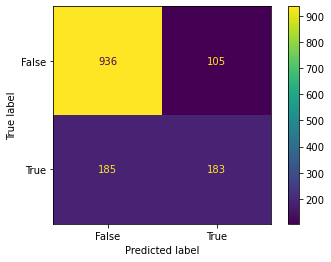

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

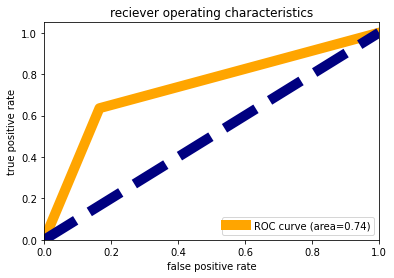

In [24]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [25]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.64      0.50      0.56       368

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



## Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)




At random state: 0

Train Accuracy-  100.0

Test Accuracy-  71.0


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  74.4


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  73.0


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  73.5


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  69.9


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  71.6


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  72.6


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  72.1


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  73.7


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  74.3


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  73.5


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  72.9


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  73.7


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  73.4


At random state: 14

Train Accuracy-  100.0

Test Accura

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.20)
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 75.4


## Cross Validation Score

In [52]:
for i in range(4,15):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 4

 cross validation score is- 72.58275095503588

 Accuracy score is- 75.4


At cv- 5

 cross validation score is- 72.90928043744758

 Accuracy score is- 75.4


At cv- 6

 cross validation score is- 72.78153687962111

 Accuracy score is- 75.4


At cv- 7

 cross validation score is- 73.19324230528306

 Accuracy score is- 75.4


At cv- 8

 cross validation score is- 73.87498710143431

 Accuracy score is- 75.4


At cv- 9

 cross validation score is- 73.02296564136232

 Accuracy score is- 75.4


At cv- 10

 cross validation score is- 72.34141279819471

 Accuracy score is- 75.4


At cv- 11

 cross validation score is- 72.78118795206355

 Accuracy score is- 75.4


At cv- 12

 cross validation score is- 73.13665153021573

 Accuracy score is- 75.4


At cv- 13

 cross validation score is- 73.34964896641713

 Accuracy score is- 75.4


At cv- 14

 cross validation score is- 73.44881955432936

 Accuracy score is- 75.4


So we are getting the least difference between cross_val_score and accuracy score at cv=8

In [53]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=8).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 73.94583247342895
accuracy score for decision tree classifier model is- 75.4


## Confusion Matrix

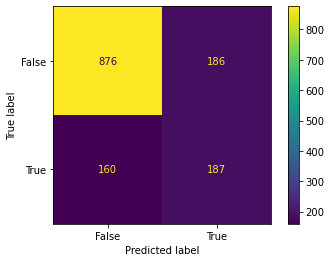

In [54]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

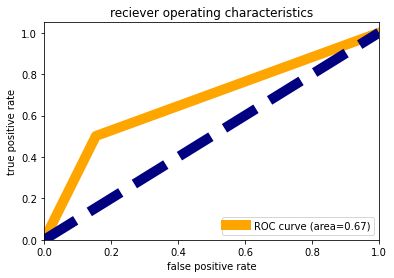

In [55]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [56]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1062
           1       0.50      0.54      0.52       347

    accuracy                           0.75      1409
   macro avg       0.67      0.68      0.68      1409
weighted avg       0.76      0.75      0.76      1409



## Knn classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  83.9

Test Accuracy-  73.8


At random state: 1

Train Accuracy-  83.5

Test Accuracy-  77.0


At random state: 2

Train Accuracy-  83.4

Test Accuracy-  75.9


At random state: 3

Train Accuracy-  82.8

Test Accuracy-  77.3


At random state: 4

Train Accuracy-  83.6

Test Accuracy-  75.0


At random state: 5

Train Accuracy-  83.6

Test Accuracy-  77.3


At random state: 6

Train Accuracy-  83.9

Test Accuracy-  76.2


At random state: 7

Train Accuracy-  83.2

Test Accuracy-  77.3


At random state: 8

Train Accuracy-  83.6

Test Accuracy-  74.8


At random state: 9

Train Accuracy-  84.0

Test Accuracy-  75.2


At random state: 10

Train Accuracy-  83.8

Test Accuracy-  75.2


At random state: 11

Train Accuracy-  84.2

Test Accuracy-  76.8


At random state: 12

Train Accuracy-  83.5

Test Accuracy-  75.8


At random state: 13

Train Accuracy-  83.1

Test Accuracy-  77.1


At random state: 14

Train Accuracy-  82.8

Test Accuracy-  77.1


At 

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  83.2

Test Accuracy-  77.4


## Cross validation score

In [59]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 76.5300094212999

 Accuracy score is- 77.4


At cv- 5

 cross validation score is- 76.5441621233628

 Accuracy score is- 77.4


At cv- 6

 cross validation score is- 76.47325083157722

 Accuracy score is- 77.4


At cv- 7

 cross validation score is- 76.60081502755351

 Accuracy score is- 77.4


At cv- 8

 cross validation score is- 76.54390994221443

 Accuracy score is- 77.4


At cv- 9

 cross validation score is- 76.54386314468039

 Accuracy score is- 77.4


At cv- 10

 cross validation score is- 76.62906995486782

 Accuracy score is- 77.4


At cv- 11

 cross validation score is- 76.41602254999292

 Accuracy score is- 77.4


At cv- 12

 cross validation score is- 76.43067079091348

 Accuracy score is- 77.4


At cv- 13

 cross validation score is- 76.31692028565386

 Accuracy score is- 77.4


At cv- 14

 cross validation score is- 76.33126975110788

 Accuracy score is- 77.4


So we are getting the least difference between cross_val_score and accuracy score at cv=13

In [61]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 76.31692028565386
accuracy score for Knn classifier model is- 77.4


## Confusion Matrix

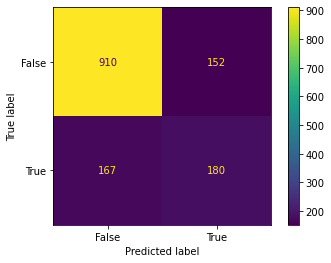

In [62]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

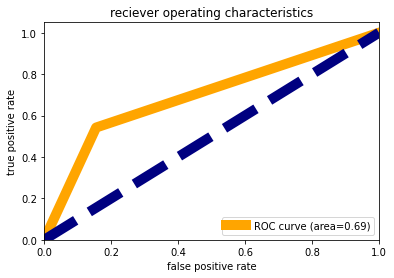

In [63]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [64]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1062
           1       0.54      0.52      0.53       347

    accuracy                           0.77      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.77      0.77      0.77      1409



## Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  78.4


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  80.6


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  79.2


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  80.2


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  78.2


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  79.0


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  79.0


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  79.2


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  78.1


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  78.5


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  79.7


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  79.5


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  79.6


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  80.2


At random state: 14

Train Accuracy-  100.0

Test Accura

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=18,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  81.9


## Cross Validation score

In [67]:
for i in range(4,15):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 79.10011260389241

 Accuracy score is- 81.9


At cv- 5

 cross validation score is- 79.08580795535197

 Accuracy score is- 81.9


At cv- 6

 cross validation score is- 79.07163013342512

 Accuracy score is- 81.9


At cv- 7

 cross validation score is- 78.91521632018076

 Accuracy score is- 81.9


At cv- 8

 cross validation score is- 79.28458105458674

 Accuracy score is- 81.9


At cv- 9

 cross validation score is- 79.15684496168764

 Accuracy score is- 81.9


At cv- 10

 cross validation score is- 79.14234767891683

 Accuracy score is- 81.9


At cv- 11

 cross validation score is- 79.1139776272869

 Accuracy score is- 81.9


At cv- 12

 cross validation score is- 79.34143356338413

 Accuracy score is- 81.9


At cv- 13

 cross validation score is- 79.4128942995672

 Accuracy score is- 81.9


At cv- 14

 cross validation score is- 79.426135928195

 Accuracy score is- 81.9


So we are getting the least difference between cross_val_score and accuracy score at cv=14.

In [68]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 79.56814104037905
accuracy score for random forest classifier model is- 81.9


## Confusion Matrix

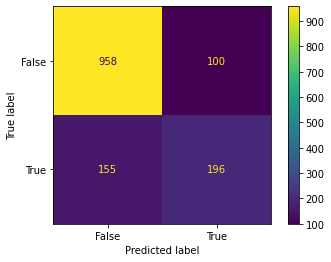

In [69]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

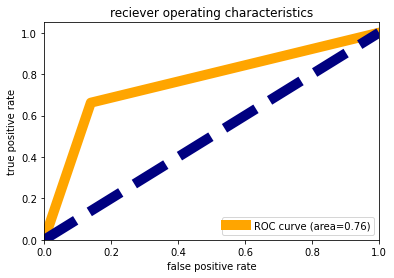

In [71]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [72]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1058
           1       0.66      0.56      0.61       351

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



## XGBoost

In [81]:
from xgboost import XGBClassifier
xgmod=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.25)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  96.1

Test Accuracy-  78.7


## Cross Validation Score

In [82]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=8).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for XGBoost classifier model is-",xg_test_acc)

cross validation score is- 78.71657659168301
accuracy score for XGBoost classifier model is- 78.7


## Confusion Matrix

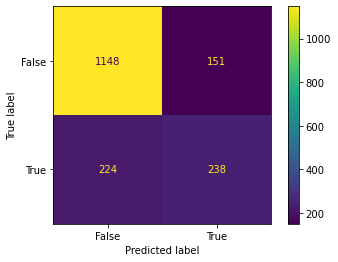

In [83]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

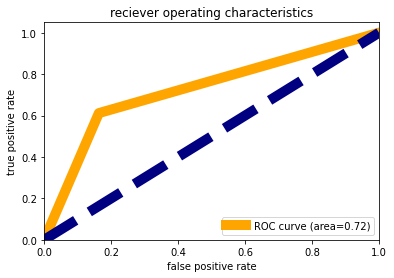

In [85]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [86]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1299
           1       0.61      0.52      0.56       462

    accuracy                           0.79      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



## Model Summary

In [87]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier','XGBoost']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

,Models,Test Accuracy,CV Score
0,Logistic Regression,79.4,79.213643
1,Decision Tree Classifier,75.4,73.945832
2,Knn Classifier,77.4,76.316920
3,Random Forest Classifier,81.9,79.568141
4,XGBoost,78.7,78.716577


We would finalize Random Forest Classifier as our final model because it has highest accuracy, the area under auc-roc curve is highest for this model and recall and f1-score is also highest for this model among all others.

## Hyperparameter tuning on Random Forest Classifier

In [88]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    'bootstrap': [True, False],
    "min_samples_split": [2, 6, 10]
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=10,
                       n_estimators=300)

In [95]:
rf1=RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=10,
                       n_estimators=300,bootstrap=False)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  90.2

Test Accuracy-  79.4


Accuracy didnot improve so we will save the previous model.

## Model Saving

In [96]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))